In [206]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm, skew
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt



In [207]:
train = pd.read_csv('D:/PTHB/House Price/train.csv')
test = pd.read_csv('D:/PTHB/House Price/test.csv')
combine = [train, test]

In [208]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [209]:
train['MSZoning'].describe()

count     1460
unique       5
top         RL
freq      1151
Name: MSZoning, dtype: object

In [210]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [211]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- Categorical variables: (46)
    `MSSubClass`, `MSZoning`, `Street`, `Alley`, `LotShape`, `LandContour`, `Utilities`, `LotConfig`, `LandSlope`, `Neighborhood`, `Condition1`, `Condition2`, `BldgType`, `HouseStyle`, `OverallQual`, `OverallCond`, `RoofStyle`, `RoofMatl`, `Exterior1st`, `Exterior2nd`, `MasVnrType`, `ExterQual`, `ExterCond`, `Foundation`, `BsmtQual`, `BsmtCond`, `BsmtExposure`, `BsmtFinType1`, `BsmtFinType2`, `Heating`, `HeatingQC`, `CentralAir`, `Electrical`, `KitchenQual`, `Functional`, `FireplaceQu`, `GarageType`, `GarageFinish`, `GarageQual`, `GarageCond`, `PavedDrive`, `PoolQC`, `Fence`, `MiscFeature`, `SaleType`, `SaleCondition`
- Numerical variables: (33)
    `LotFrontage`, `LotAre`, `YearBuilt`, `YearRemodAdd`, `MasVnrArea`, `BsmtFinSF1`, `BsmtFinSF2`, `BsmtUnfSF`, `TotalBsmtSF`, `1stFlrSF`, `2ndFlrSF`, `LowQualFinSF`, `GrLivArea`, `BsmtFullBath`, `BsmtHalfBath`, `FullBath`, `HalfBath`, `Bedroom`, `Kitchen`, `TotRmsAbvGrd`, `Fireplaces`, `GarageYrBlt`, `GarageCars`, `GarageArea`, `WoodDeckSF`, `OpenPorchSF`, `EnclosedPorch`, `3SsnPorch`, `ScreenPorch`, `PoolArea`, `MiscVal`, `MoSold`, `YrSold`

In [212]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\PC\AppData\Local\Temp\ipykernel_6664\4257204882.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

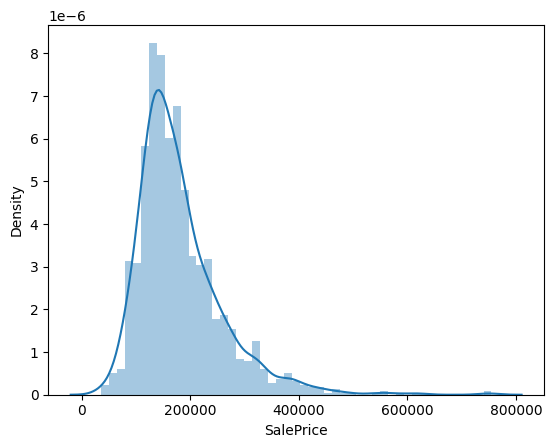

In [213]:
sns.distplot(train['SalePrice'])

In [214]:
mu, std = norm.fit(train['SalePrice'])
print('Mean =', mu, 'and standard deviation =', std)

Mean = 180921.19589041095 and standard deviation = 79415.29188606751


C:\Users\PC\AppData\Local\Temp\ipykernel_6664\1884378328.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice'], fit = norm, kde = True)


Text(0.5, 1.0, 'SalePrice Distribution')

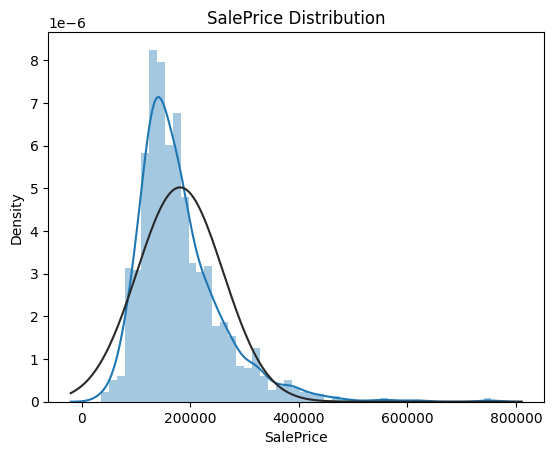

In [215]:
sns.distplot(train['SalePrice'], fit = norm, kde = True)
plt.title('SalePrice Distribution')

- Deviate from the normal distribution
- Have appreciable positive skewness (độ lệch dương)

#### Relationship with numerical variables

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

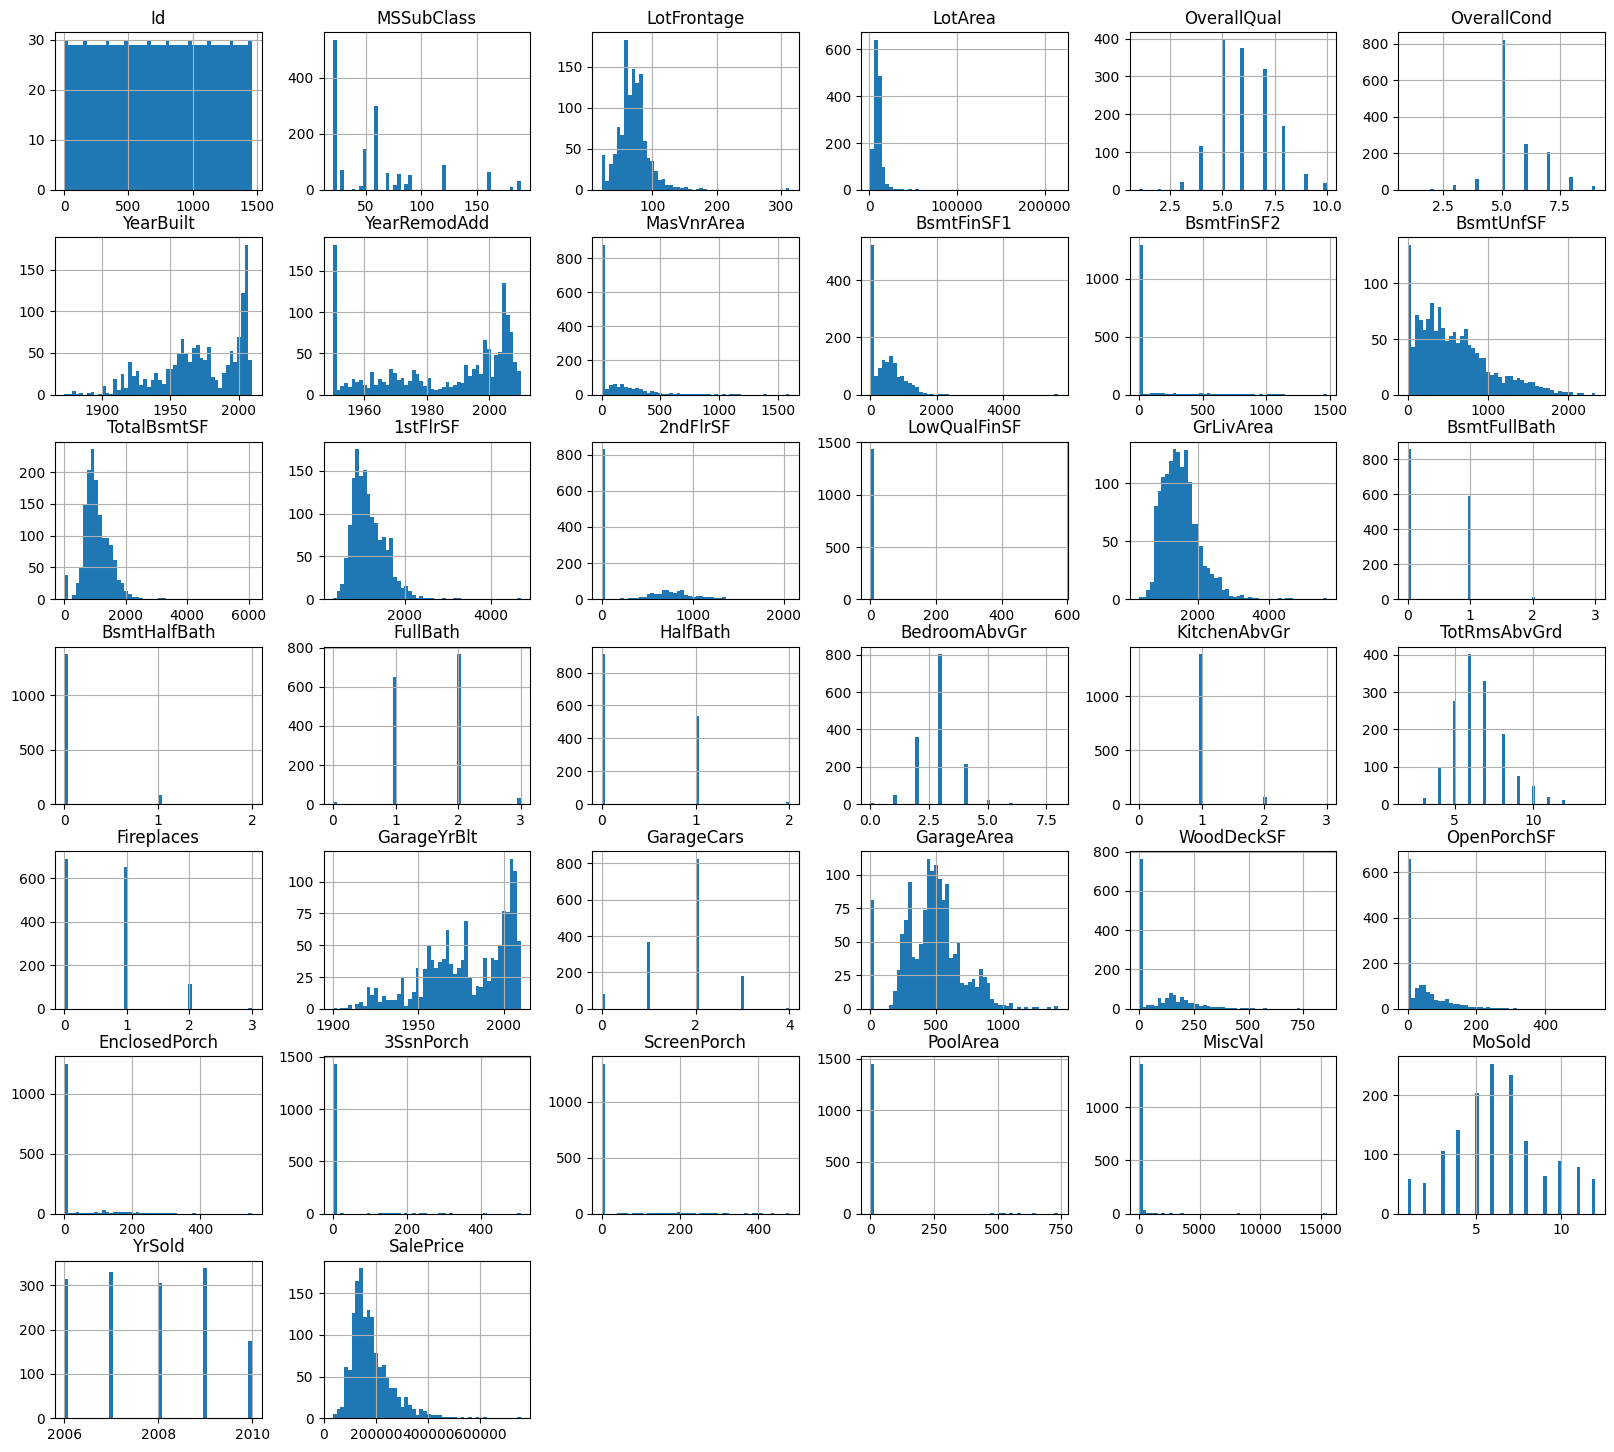

In [216]:
train.hist(bins=50, figsize=(20, 18))

### Remove outlier

Text(0.5, 1.0, 'Relationship of GrLivArea and SalePrice')

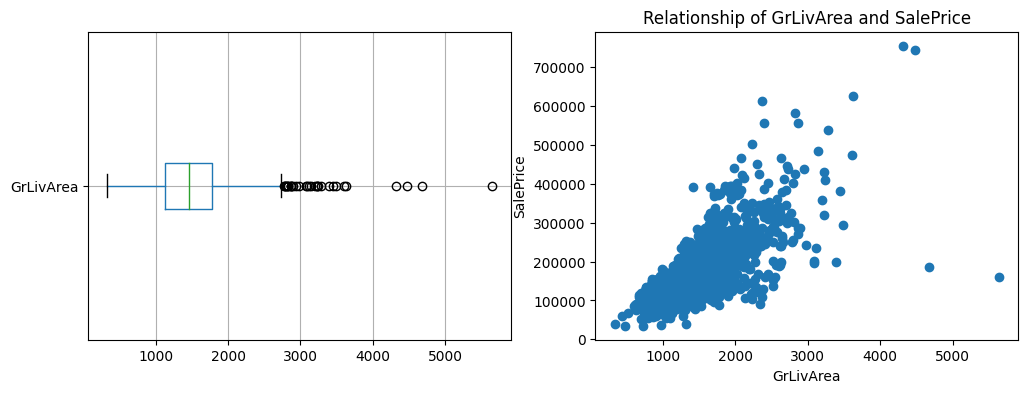

In [217]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

train[["GrLivArea"]].boxplot(vert=False, ax = axes[0])
plt.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('Relationship of GrLivArea and SalePrice')


Text(0.5, 1.0, 'Relationship of GarageArea and SalePrice')

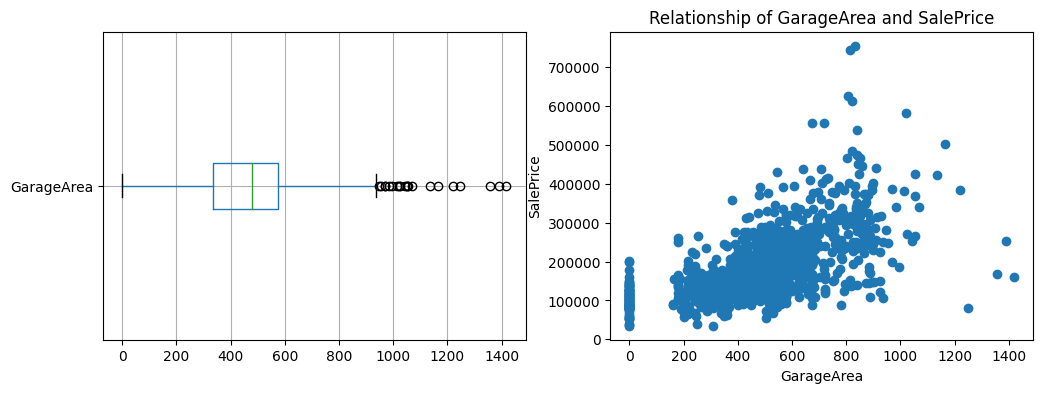

In [218]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

train[["GarageArea"]].boxplot(vert=False, ax = axes[0])
plt.scatter(x = train['GarageArea'], y = train['SalePrice'])
plt.xlabel('GarageArea')
plt.ylabel('SalePrice')
plt.title('Relationship of GarageArea and SalePrice')

Text(0.5, 1.0, 'Relationship of TotalBsmtSF and SalePrice')

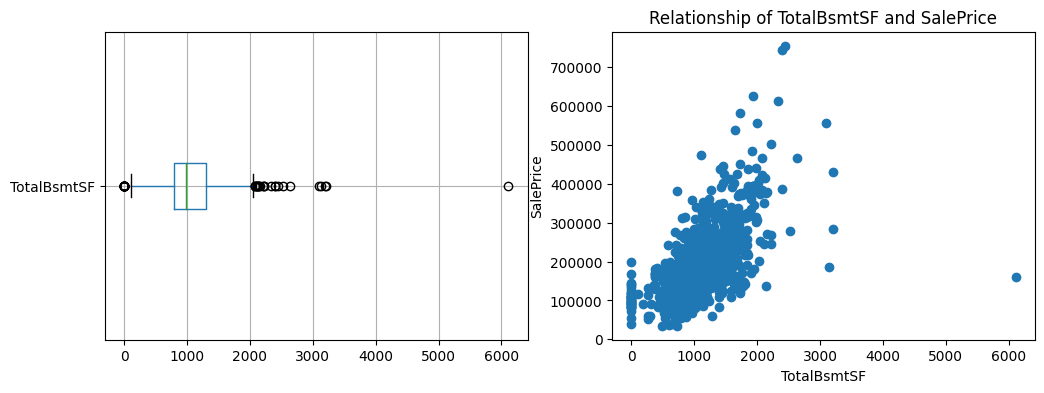

In [219]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

train[['TotalBsmtSF']].boxplot(vert=False, ax=axes[0])
plt.scatter(x = train['TotalBsmtSF'], y = train['SalePrice'])
plt.xlabel('TotalBsmtSF')
plt.ylabel('SalePrice')
plt.title('Relationship of TotalBsmtSF and SalePrice')

Text(0.5, 1.0, 'Relationship of 1stFlrSF and SalePrice')

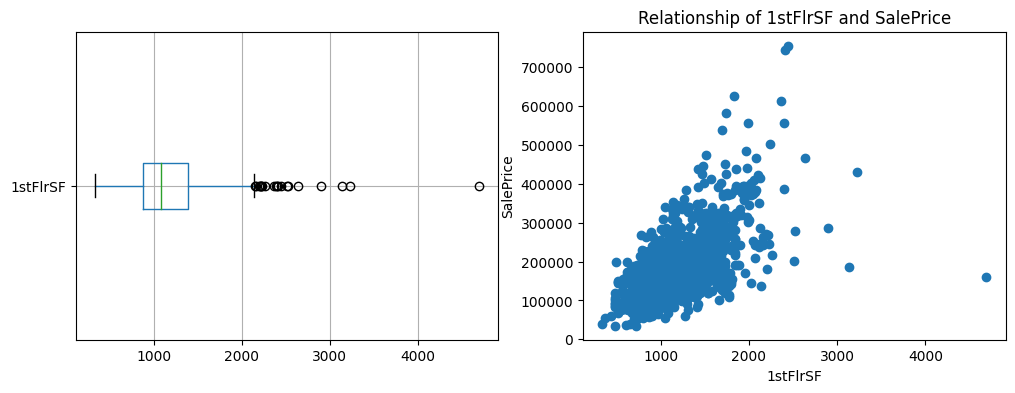

In [220]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

train[['1stFlrSF']].boxplot(vert=False, ax=axes[0])
plt.scatter(x = train['1stFlrSF'], y = train['SalePrice'])
plt.xlabel('1stFlrSF')
plt.ylabel('SalePrice')
plt.title('Relationship of 1stFlrSF and SalePrice')

- Remove outlier by IQR

In [221]:
from typing import Tuple
from sklearn.base import BaseEstimator, TransformerMixin

def find_boxplot_boundaries(
    col: pd.Series, whisker_coeff: float = 1.5
) -> Tuple[float, float]:
    """Findx minimum and maximum in boxplot.

    Args:
        col: a pandas serires of input.
        whisker_coeff: whisker coefficient in box plot
    """
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - whisker_coeff * IQR
    upper = Q3 + whisker_coeff * IQR
    return lower, upper


class BoxplotOutlierClipper(BaseEstimator, TransformerMixin):
    def __init__(self, whisker_coeff: float = 1.5):
        self.whisker = whisker_coeff
        self.lower = None
        self.upper = None

    def fit(self, X: pd.Series):
        self.lower, self.upper = find_boxplot_boundaries(X, self.whisker)
        return self

    def transform(self, X):
        return X.clip(self.lower, self.upper)

In [222]:
cols = ['1stFlrSF', 'GrLivArea', 'GarageArea', 'TotalBsmtSF']

In [223]:
for df in combine:
    for i in cols:
        df[i] = BoxplotOutlierClipper().fit_transform(df[i])

- `GrLivArea`, `GarageArea `, `TotalBsmtSF` and `1stFlrSF` seem to be linearly related with 'SalePrice'. All relationships are positive, which means that as one variable increases, the other also increases

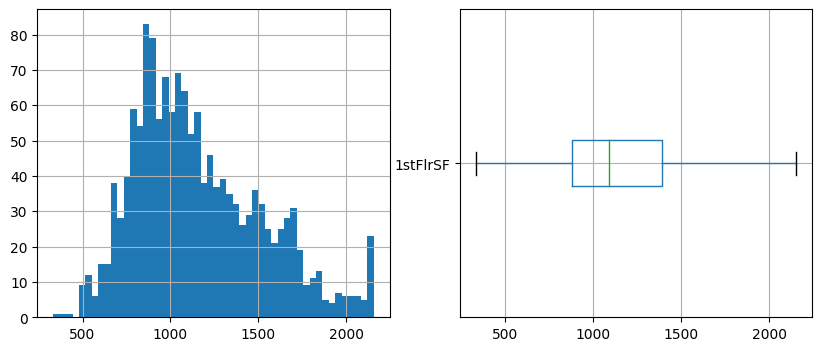

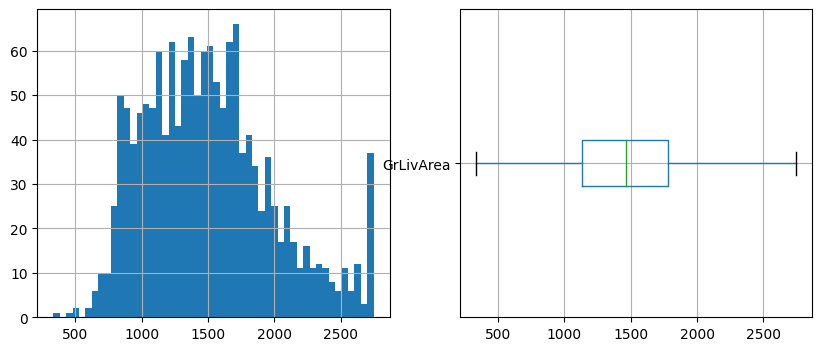

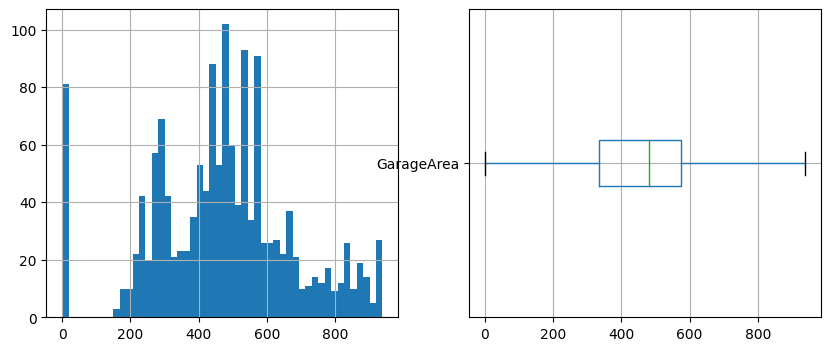

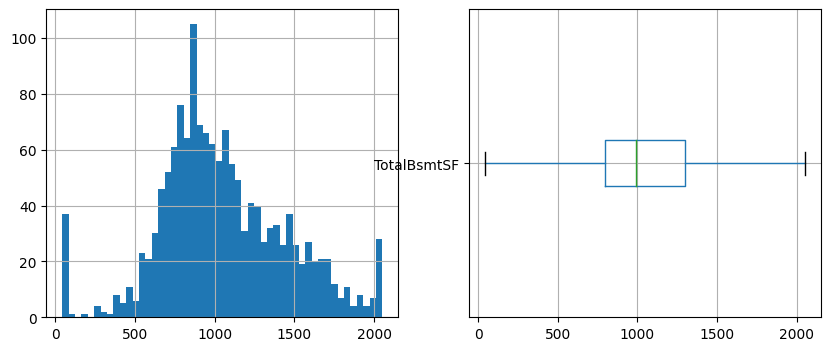

In [224]:
for i in cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    train[i].hist(bins=50, ax=axes[0])
    train[[i]].boxplot(ax=axes[1], vert=False)

#### Relationship with categorical variables

<Axes: xlabel='OverallQual', ylabel='SalePrice'>

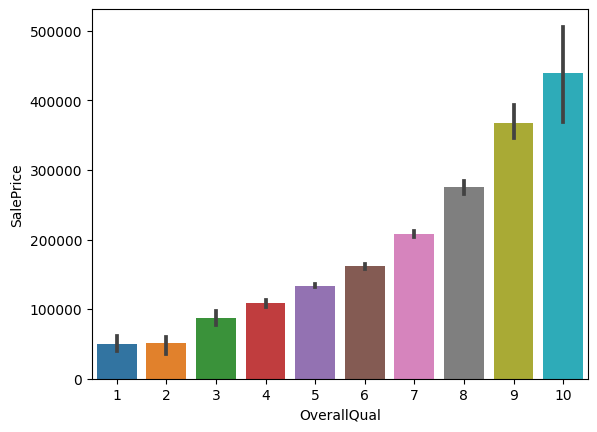

In [225]:
sns.barplot(data = train, x = 'OverallQual', y = 'SalePrice')

C:\Users\PC\AppData\Local\Temp\ipykernel_6664\1296531946.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data = train, x = 'YearBuilt', y = 'SalePrice', ci = None)


<Axes: xlabel='YearBuilt', ylabel='SalePrice'>

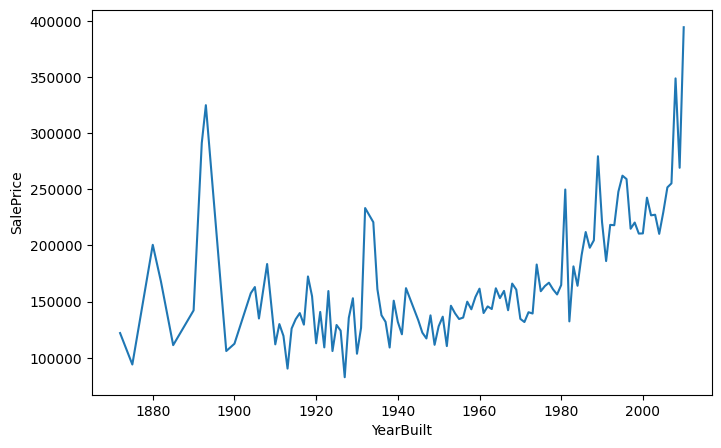

In [226]:
plt.figure(figsize = (8, 5))
sns.lineplot(data = train, x = 'YearBuilt', y = 'SalePrice', ci = None)

<Axes: xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

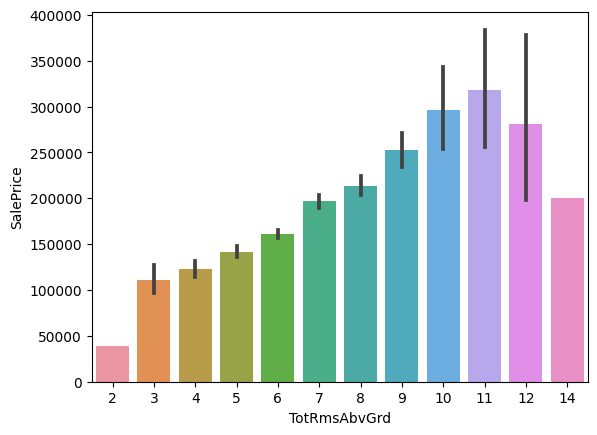

In [227]:
sns.barplot(data = train, x = 'TotRmsAbvGrd', y = 'SalePrice')

### Select features

<Axes: >

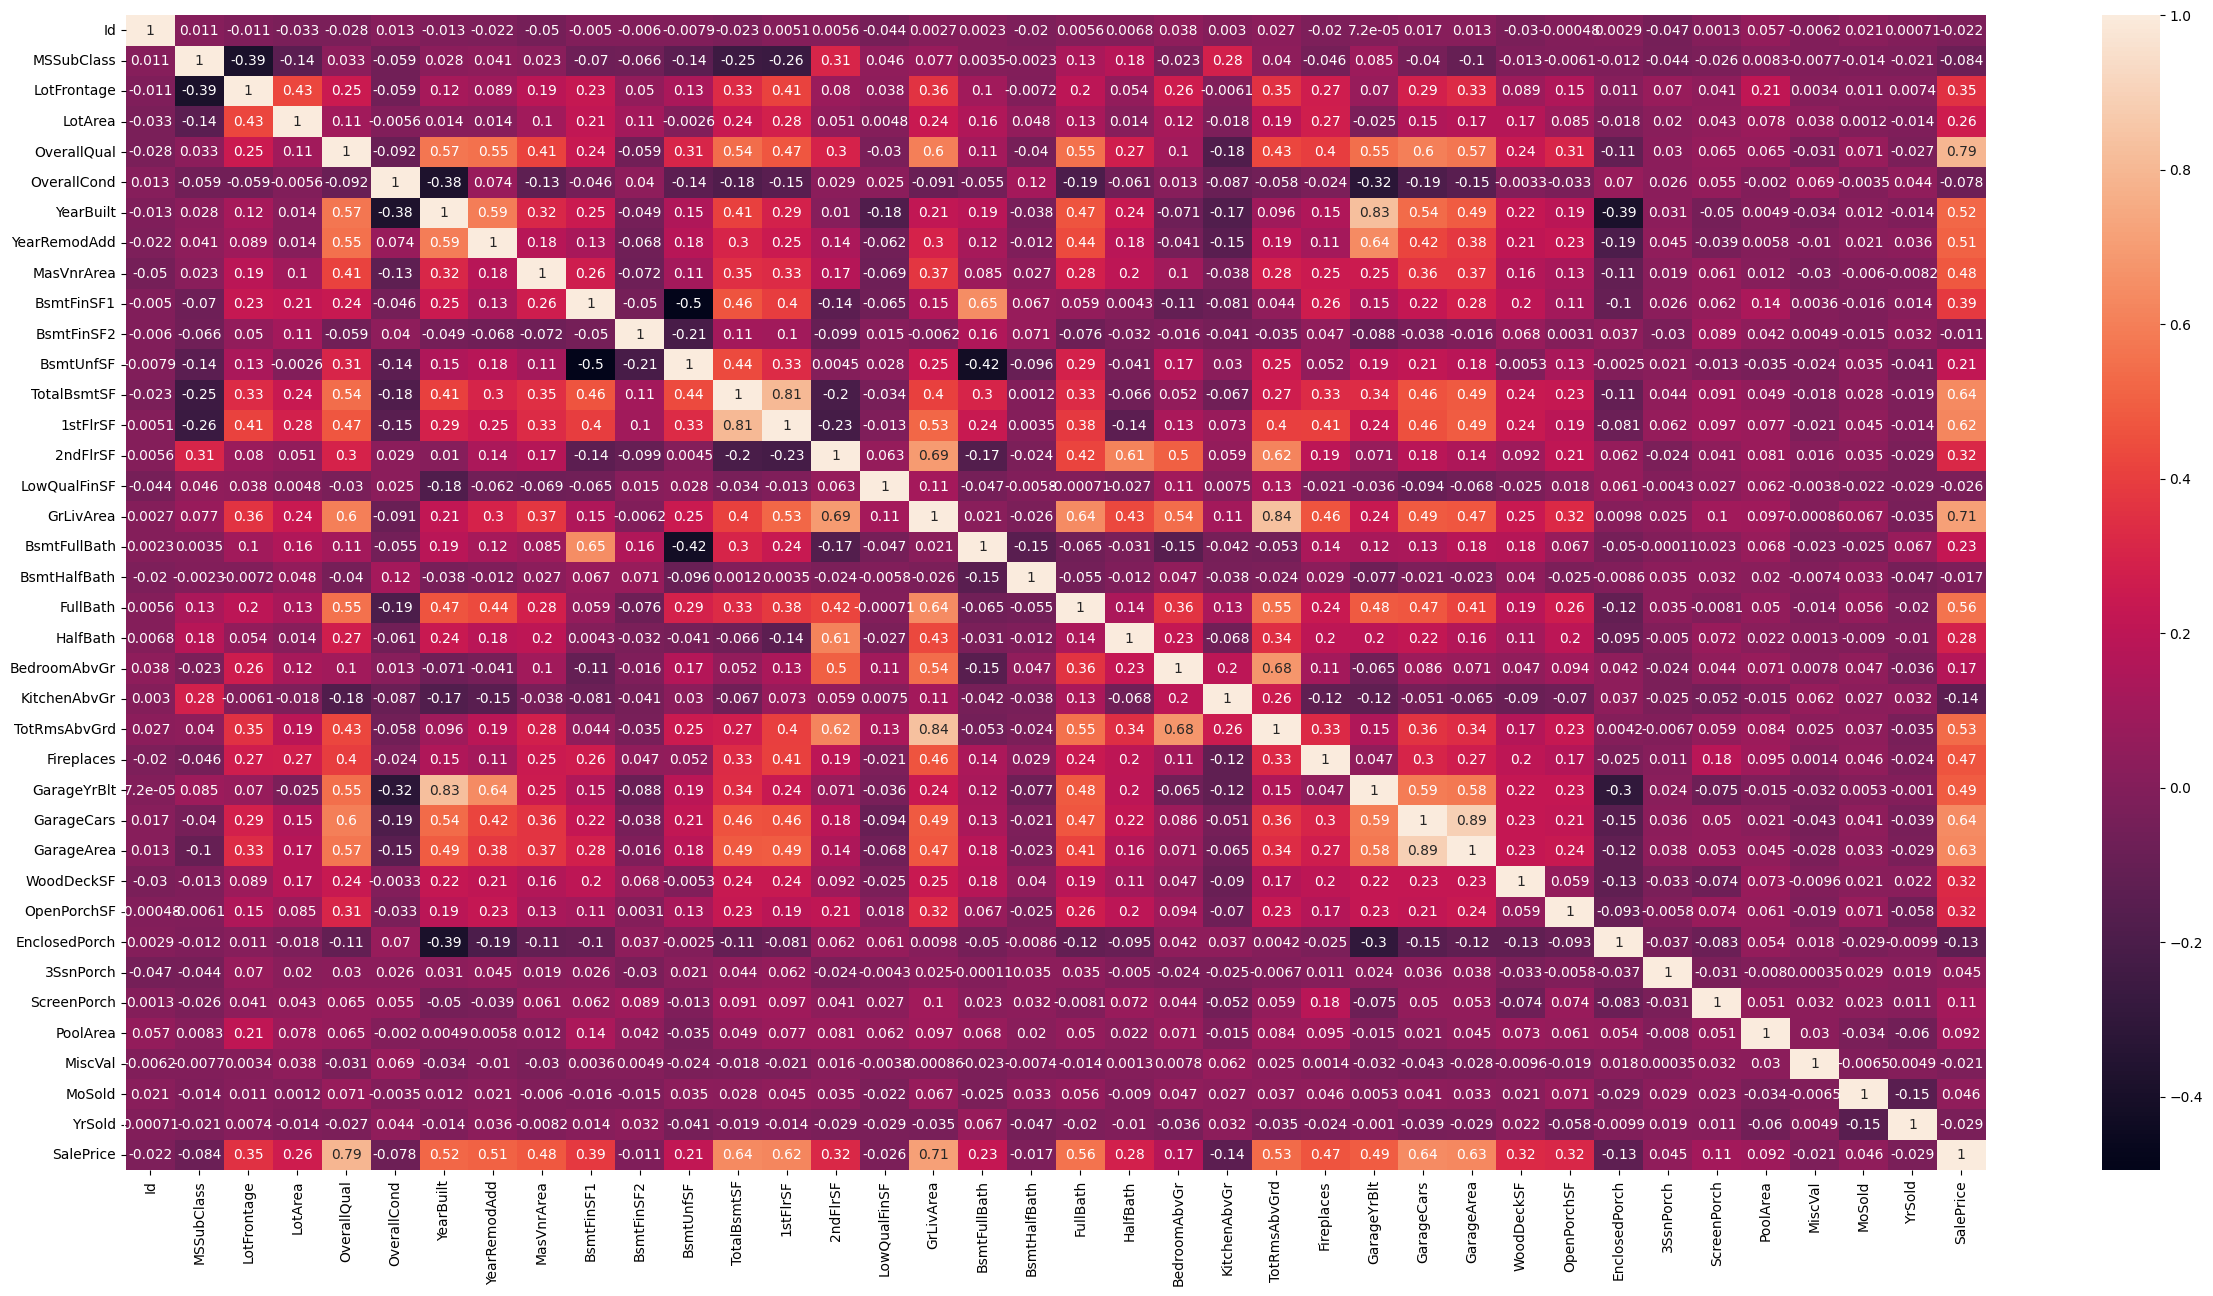

In [228]:
#correlation matrix
corrmat = train.select_dtypes(include = [np.number]).corr()
f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corrmat, annot = True)

In [229]:
corrmat['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708153
GarageCars       0.640409
TotalBsmtSF      0.636999
GarageArea       0.630138
1stFlrSF         0.620743
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


<Axes: >

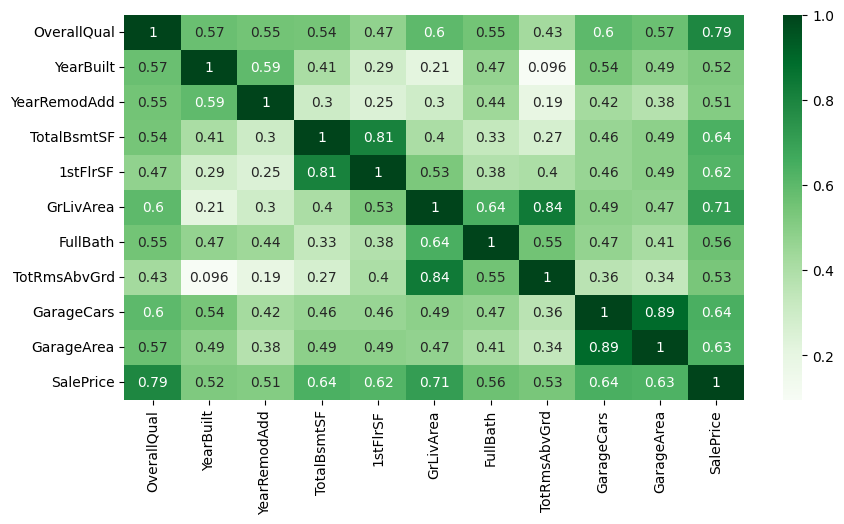

In [230]:
# most correlated features
idx = corrmat.index[corrmat["SalePrice"]>0.5]
print(idx)
plt.figure(figsize = (10,5))
sns.heatmap(train[idx].corr(), cmap = 'Greens', annot = True)

In [231]:
features = list(idx) 

In [232]:
cat_cols = ["MSZoning", "Utilities","BldgType","Heating","KitchenQual","SaleCondition","LandSlope"]

In [233]:
features = features + cat_cols

In [234]:
features_test = list(idx) + cat_cols
features_test.pop(10)

'SalePrice'

In [235]:
train_df = train[features]
test_df = test[features_test]

In [236]:
train_df.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,7,2003,2003,856,856.0,1710.0,2,8,2,548.0,208500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
1,6,1976,1976,1262,1262.0,1262.0,2,6,2,460.0,181500,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
2,7,2001,2002,920,920.0,1786.0,2,6,2,608.0,223500,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
3,7,1915,1970,756,961.0,1717.0,1,7,3,642.0,140000,RL,AllPub,1Fam,GasA,Gd,Abnorml,Gtl
4,8,2000,2000,1145,1145.0,2198.0,2,9,3,836.0,250000,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl


In [237]:
test_df.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,MSZoning,Utilities,BldgType,Heating,KitchenQual,SaleCondition,LandSlope
0,5,1961,1961,882.0,896,896.0,1,5,1.0,730.0,RH,AllPub,1Fam,GasA,TA,Normal,Gtl
1,6,1958,1958,1329.0,1329,1329.0,1,6,1.0,312.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
2,5,1997,1998,928.0,928,1629.0,2,6,2.0,482.0,RL,AllPub,1Fam,GasA,TA,Normal,Gtl
3,6,1998,1998,926.0,926,1604.0,2,7,2.0,470.0,RL,AllPub,1Fam,GasA,Gd,Normal,Gtl
4,8,1992,1992,1280.0,1280,1280.0,2,5,2.0,506.0,RL,AllPub,TwnhsE,GasA,Gd,Normal,Gtl


### Filling missing data

In [238]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   OverallQual    1460 non-null   int64  
 1   YearBuilt      1460 non-null   int64  
 2   YearRemodAdd   1460 non-null   int64  
 3   TotalBsmtSF    1460 non-null   int64  
 4   1stFlrSF       1460 non-null   float64
 5   GrLivArea      1460 non-null   float64
 6   FullBath       1460 non-null   int64  
 7   TotRmsAbvGrd   1460 non-null   int64  
 8   GarageCars     1460 non-null   int64  
 9   GarageArea     1460 non-null   float64
 10  SalePrice      1460 non-null   int64  
 11  MSZoning       1460 non-null   object 
 12  Utilities      1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  Heating        1460 non-null   object 
 15  KitchenQual    1460 non-null   object 
 16  SaleCondition  1460 non-null   object 
 17  LandSlope      1460 non-null   object 
dtypes: float

In [239]:
train_df.isnull().sum().sort_values(ascending=False)

OverallQual      0
YearBuilt        0
SaleCondition    0
KitchenQual      0
Heating          0
BldgType         0
Utilities        0
MSZoning         0
SalePrice        0
GarageArea       0
GarageCars       0
TotRmsAbvGrd     0
FullBath         0
GrLivArea        0
1stFlrSF         0
TotalBsmtSF      0
YearRemodAdd     0
LandSlope        0
dtype: int64

In [240]:
test_df.isnull().sum().sort_values(ascending=False)

MSZoning         4
Utilities        2
GarageCars       1
GarageArea       1
TotalBsmtSF      1
KitchenQual      1
SaleCondition    0
Heating          0
BldgType         0
OverallQual      0
YearBuilt        0
TotRmsAbvGrd     0
FullBath         0
GrLivArea        0
1stFlrSF         0
YearRemodAdd     0
LandSlope        0
dtype: int64

- `TotalBsmtSF` and `GarageArea` are numerical variables, so fill missing values by 'median'
- `GarageCars`, `MSZoning`, `Utilities` and `KitchenQual` is categorical variable, so fill missing values by the most frequency value.

In [241]:
test_df['GarageArea'].fillna(test_df['GarageArea'].dropna().median(), inplace=True)
test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].dropna().median(), inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_6664\1117617551.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['GarageArea'].fillna(test_df['GarageArea'].dropna().median(), inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_6664\1117617551.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['TotalBsmtSF'].fillna(test_df['TotalBsmtSF'].dropna().median(), inplace=True)


In [242]:
test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df.GarageCars.dropna().mode()[0])
test_df['MSZoning'] = test_df['MSZoning'].fillna(test_df.MSZoning.dropna().mode()[0])
test_df['Utilities'] = test_df['Utilities'].fillna(test_df.Utilities.dropna().mode()[0])
test_df['KitchenQual'] = test_df['KitchenQual'].fillna(test_df.KitchenQual.dropna().mode()[0])

C:\Users\PC\AppData\Local\Temp\ipykernel_6664\2786247901.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['GarageCars'] = test_df['GarageCars'].fillna(test_df.GarageCars.dropna().mode()[0])
C:\Users\PC\AppData\Local\Temp\ipykernel_6664\2786247901.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['MSZoning'] = test_df['MSZoning'].fillna(test_df.MSZoning.dropna().mode()[0])
C:\Users\PC\AppData\Local\Temp\ipykernel_6664\2786247901.py:3: SettingWithCopyWarning: 
A value is trying to be set 

In [243]:
test_df.isnull().sum()

OverallQual      0
YearBuilt        0
YearRemodAdd     0
TotalBsmtSF      0
1stFlrSF         0
GrLivArea        0
FullBath         0
TotRmsAbvGrd     0
GarageCars       0
GarageArea       0
MSZoning         0
Utilities        0
BldgType         0
Heating          0
KitchenQual      0
SaleCondition    0
LandSlope        0
dtype: int64

In [244]:
combine = [train_df, test_df]

In [249]:
train_df = pd.get_dummies(train_df, columns=cat_cols)


KeyError: "None of [Index(['MSZoning', 'Utilities', 'BldgType', 'Heating', 'KitchenQual',\n       'SaleCondition', 'LandSlope'],\n      dtype='object')] are in the [columns]"

In [246]:
X = train_df.drop('SalePrice', axis = 1)
y = train_df['SalePrice']

In [247]:
combine = [X, test_df]

In [248]:
from sklearn.preprocessing import StandardScaler
for df in combine:
    scaler = StandardScaler().fit(df)
    df = scaler.transform(df)


ValueError: could not convert string to float: 'RH'

In [ ]:
scaler = StandardScaler().fit(test_df)
test_df = scaler.transform(test_df)

In [ ]:
test_df

array([[-0.75110125, -0.34094461, -1.07288463, ..., -0.63286153,
        -0.98818867,  1.23879125],
       [-0.05487716, -0.43969491, -1.21490841, ..., -0.74640498,
        -0.98818867, -0.75507457],
       [-0.75110125,  0.844059  ,  0.6787419 , ...,  0.72965986,
         0.30140638,  0.0558278 ],
       ...,
       [-0.75110125, -0.37386137,  0.58405938, ..., -0.67070935,
         0.30140638,  0.50420911],
       [-0.75110125,  0.67947517,  0.39469435, ...,         nan,
        -2.27778373, -2.24331891],
       [ 0.64134693,  0.71239193,  0.48937687, ...,  0.57826859,
         1.59100144,  0.85719014]])

In [ ]:
X.shape

(1460, 13)

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_valid,  y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
X_train.shape, y_train.shape, X_valid.shape

((1168, 13), (1168,), (292, 13))

### Select and train a model

#### 1. Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_valid)

acc_lr = round(lr.score(X_train, y_train) * 100, 2)
acc_lr

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(y_valid, y_pred_lr)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

43131.32457373935

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
y_pred_tree_reg = tree_reg.predict(X_valid)

acc_tree_rg = round(tree_reg.score(X_train, y_train) * 100, 2)
acc_tree_rg

99.99

In [ ]:
tree_mse = mean_squared_error(y_valid, y_pred_tree_reg)
tree_mse = np.sqrt(tree_mse)
tree_mse

45034.133057984436

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_valid)

acc_forest = round(forest.score(X_train, y_train)*100, 2)
acc_forest

97.67

In [ ]:
forest_mse = mean_squared_error(y_valid, y_pred_forest)
forest_mse = np.sqrt(forest_mse)
forest_mse

31432.04824831

In [ ]:
from sklearn.svm import SVR
svr = SVR(C=1e5)
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_valid)

acc_svr = round(svr.score(X_train, y_train)*100, 2)
acc_svr

77.73

In [ ]:
svr_mse = mean_squared_error(y_valid, y_pred_svr)
svr_mse = np.sqrt(svr_mse)
svr_mse

45905.37757317127

### Fine-tune model

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [ ]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [ ]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

38299.422178940935 {'max_features': 2, 'n_estimators': 3}
34664.1836913788 {'max_features': 2, 'n_estimators': 10}
33350.56046490488 {'max_features': 2, 'n_estimators': 30}
37510.60460107426 {'max_features': 4, 'n_estimators': 3}
33616.64365898571 {'max_features': 4, 'n_estimators': 10}
31906.328790045733 {'max_features': 4, 'n_estimators': 30}
37705.07742315692 {'max_features': 6, 'n_estimators': 3}
34116.576023625246 {'max_features': 6, 'n_estimators': 10}
33351.20807756984 {'max_features': 6, 'n_estimators': 30}
36825.1747461809 {'max_features': 8, 'n_estimators': 3}
34355.18147240602 {'max_features': 8, 'n_estimators': 10}
33045.9381622717 {'max_features': 8, 'n_estimators': 30}
37371.85258329876 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
35145.72068993866 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
36399.14036221296 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
34324.78153636577 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10

#### Evaluate Your System on the Test Set

In [ ]:
final_model = grid_search.best_estimator_

final_predict = final_model.predict(test_df)

c:\Users\PC\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
y_test = pd.read_csv('D:/PTHB/House Price/sample_submission.csv')

In [ ]:
y_test = y_test.drop('Id', axis=1)

In [ ]:
final_mse = mean_squared_error(y_test, final_predict)
final_rmse = np.sqrt(final_mse)
final_rmse

132227.90499021526

In [ ]:
id_col_test = test['Id']

sale_price_pred = pd.DataFrame(columns=["SalePrice"])

sale_price_pred.insert(0,'Id',id_col_test)

sale_price_pred['SalePrice'] = final_predict

In [ ]:
sale_price_pred

,Id,SalePrice
0,1461,44901.833333
1,1462,44901.833333
2,1463,46384.066667
3,1464,46384.066667
4,1465,46384.066667
...,...,...
1454,2915,44901.833333
1455,2916,44901.833333
1456,2917,44901.833333
1457,2918,44901.833333
